## 01010

In [1]:
import os.path
import platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data/owid-covid-data.csv', encoding='cp949')
#df = pd.read_csv('../ch04/data/owid-covid-data.csv', encoding='cp949') 상위로 이동
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [14]:
db = pd.read_csv('data/data-bar.csv', sep='|')
db.head()

,일,월,화,수,목,금,토
0,1,2,3,4,5,6,7
1,8,9,10,11,12,13,14


In [15]:
# 원하는 값 추출
select_columns = ['iso_code', 'location', 'date', 'total_cases','population']
df2 = df[select_columns]
df2.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-05,0.0,41128772
1,AFG,Afghanistan,2020-01-06,0.0,41128772
2,AFG,Afghanistan,2020-01-07,0.0,41128772
3,AFG,Afghanistan,2020-01-08,0.0,41128772
4,AFG,Afghanistan,2020-01-09,0.0,41128772


In [16]:
location_df = df['location']
location_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: location, dtype: object

In [17]:
location_df.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [18]:
location_df.unique().size

255

In [19]:
south_koera_df = df2[df2['location']=='South Korea']
south_koera_df.head()

,iso_code,location,date,total_cases,population
359238,KOR,South Korea,2020-01-05,0.0,51815808
359239,KOR,South Korea,2020-01-06,0.0,51815808
359240,KOR,South Korea,2020-01-07,0.0,51815808
359241,KOR,South Korea,2020-01-08,0.0,51815808
359242,KOR,South Korea,2020-01-09,0.0,51815808


In [20]:
korea_date_index_df = south_koera_df.set_index('date')
korea_date_index_df.head() #date 값을 앞으로 끌고 옴

,iso_code,location,total_cases,population
date,,,,
2020-01-05,KOR,South Korea,0.0,51815808
2020-01-06,KOR,South Korea,0.0,51815808
2020-01-07,KOR,South Korea,0.0,51815808
2020-01-08,KOR,South Korea,0.0,51815808
2020-01-09,KOR,South Korea,0.0,51815808


In [21]:
#location 미국, date를 인덱스로
usa_df = df2[df2.location =='United States']

usa_date_index_df = usa_df.set_index('date')

usa_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-05,USA,United States,0.0,338289856
2020-01-06,USA,United States,0.0,338289856
2020-01-07,USA,United States,0.0,338289856
2020-01-08,USA,United States,0.0,338289856
2020-01-09,USA,United States,0.0,338289856


In [32]:
#usa df를 csv 파일로 저장
import os
usa_covid_csv_file_path = 'data/covid-usa.csv'
if os.path.exists(usa_covid_csv_file_path):
    os.remove(usa_covid_csv_file_path)
usa_date_index_df.to_csv(usa_covid_csv_file_path)

## 시각화

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

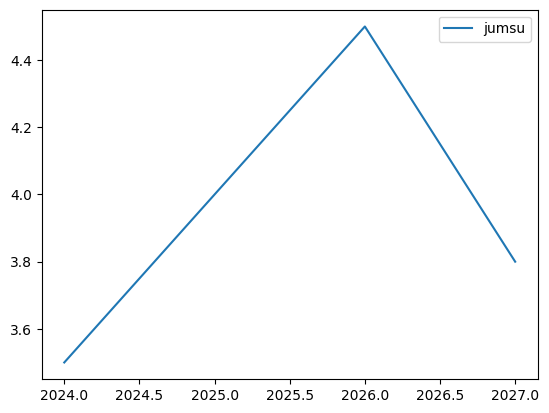

In [28]:
jumsu = [3.5, 4.0, 4.5, 3.8]
year = [2024, 2025,2026,2027]
jumsu_df = pd.DataFrame({'jumsu': jumsu}, index=year)
lines = jumsu_df.plot.line()

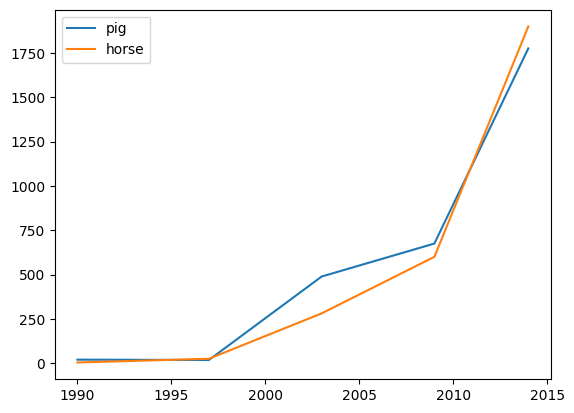

In [26]:
df = pd.DataFrame({'pig':[20,18,489,675,1776],
                   'horse':[4,25,281,600,1900]},
                  index=[1990,1997,2003,2009,2014])
lines = df.plot.line()

In [29]:
# 한글 폰트 설정
from matplotlib import rc
plt.rc('font', family='Apple SD Gothic Neo')

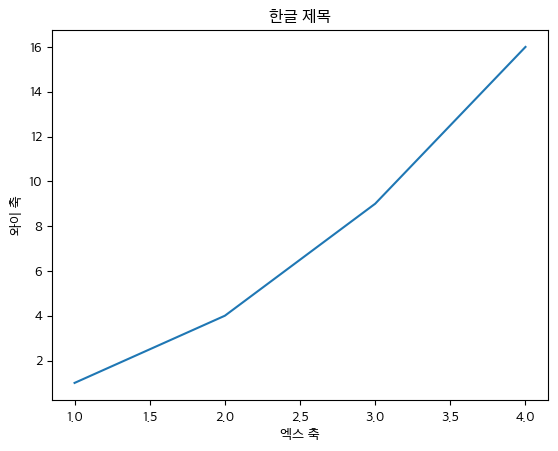

In [30]:
# 데이터 생성 및 플롯 예시~~
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

plt.plot(x, y)
plt.title('한글 제목')
plt.xlabel('엑스 축')
plt.ylabel('와이 축')
plt.show()

In [31]:
def is_macos_platform():
    return platform.system() == 'Darwin'